# Lending Club Case Study

## Business Objectives
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
### Identification of such applicants using EDA is the aim of this case study.

### Important
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
#loading required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Adding library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Sourcing
Data has been procured from online loan marketplace firm and It contains the complete loan data for all loans issued through the time period 2007 t0 2011.

In [2]:
# Loading data in to Data frames

loan_df = pd.read_csv("loan.csv")
data_dictionary_df = pd.read_excel("Data_Dictionary.xlsx")

## Understanding Data
Based on Initital Basic Data Analysis on loan sheet Columns wrt data Dictionary, Following #55 Columns can be useful to Fulfill Business Objective out of Total Columns Avalable:

* acc_now_delinq * acc_open_past_24mths * addr_state * annual_inc *  annual_inc_joint * application_type * avg_cur_bal
* collection_recovery_fee * delinq_2yrs * dti * dti_joint * earliest_cr_line * emp_length * grade * home_ownership 
* inq_last_6mths * installment * int_rate * issue_d * initial_list_status * loan_amnt * loan_status * max_bal_bc
* mo_sin_old_il_acct * mo_sin_old_rev_tl_op * mort_acc * mths_since_last_delinq * mths_since_last_major_derog
* mths_since_recent_revol_delinq * num_accts_ever_120_pd * num_actv_bc_tl * num_actv_rev_tl * num_bc_sats * num_bc_tl
* num_il_tl * open_acc * open_il_12m * open_il_24m * open_il_6m * out_prncp * out_prncp_inv * pct_tl_nvr_dlq * percent_bc_gt_75
* policy_code * pub_rec * pub_rec_bankruptcies * purpose * pymnt_plan * sub_grade * tax_liens * term * title
* verification_status * verified_status_joint

In [3]:
#get Details of Data and columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Table View of Data (Some rows and all columns)

In [4]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

## Data Cleaning 1: Fix Rows and Columns

#### Row Cleaning is not required till now as no Unnecessary Rows are present based on following checkpoints:

### Fix Rows

#### Data Cleaning 1.1.1: Delete Incorrect Rows ✓
#### Data Cleaning 1.1.2: Delete Summay Rows ✓
#### Data Cleaning 1.1.3: Delete Extra Rows ✓

Note: Rows will be further analysed

### Fix Columns

#### Data Cleaning 1.2.1: Add Column Names if Missing
All columns have their identfication name
#### Data Cleaning 1.2.2: Mereg Columns for Identifiers
None of the data needs to merged
#### Data Cleaning 1.2.3: Align Misaligned Columns
No Columns are misalighned
#### Data Cleaning 1.2.4: Split Columns for more data
No Need to Split as per the Data

#### Data Cleaning 1.2.5: Rename columns consistently

In [5]:
# Removing 'xx' from zip code columns
loan_df['zip_code'] = loan_df['zip_code'].apply(lambda x: x.replace('xx',''))
loan_df['zip_code'].head()

0    860
1    309
2    606
3    917
4    972
Name: zip_code, dtype: object

#### Data Cleaning 1.2.6: Delete unnecesaary Columns
There are columns which are irrelevant to this case study, so removing them

In [6]:
# Following are irrelevant columns
irrelevant_col = ['acc_open_past_24mths',
'collection_recovery_fee',
'delinq_2yrs',
'earliest_cr_line',
'inq_last_6mths',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mths_since_last_delinq',
'mths_since_last_major_derog',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'open_acc',
'tax_liens',
'bc_open_to_buy',
'collections_12_mths_ex_med',
'desc',
'emp_title',
'id',
'inq_fi',
'last_credit_pull_d',
'last_pymnt_amnt',
'last_pymnt_d',
'member_id',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mths_since_last_record',
'mths_since_rcnt_il',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'next_pymnt_d',
'total_rec_late_fee',
'url']
loan_df.drop(irrelevant_col,axis = 1, inplace = True)

In [7]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


## Data Cleaning 2: Fix Missing Values
#### Data Cleaning 2.1: Set Value as missing Values
#### Data Cleaning 2.2: Adding is Good, exaggerating is bad
#### Data Cleaning 2.3: Delete Rows and Columns
#### Data Cleaning 2.4: Fill Partial missing Values based on Business Judgement 

In [8]:
##### There are rows where rows data is null/Nan, such columns can be removed
# Total null value on each Columns
loan_df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
                              ...  
pub_rec_bankruptcies            697
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 78, dtype: int64

### There are Columns which are having null for all rows, so can be removed

In [9]:
# Dropping columns which contains NA
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,1,INDIVIDUAL,0,0.0,0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,117.08,1,INDIVIDUAL,0,0.0,0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,1,INDIVIDUAL,0,0.0,0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,0.00,1,INDIVIDUAL,0,0.0,0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,1,INDIVIDUAL,0,0.0,0,0.0


In [10]:
# Total null value on each Columns
loan_df.isnull().sum()
#loan_df.dropna(axis=1, how='all')

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_

## Fix Columns having null values
- emp_length
- title
- revol_util
- chargeoff_within_12_mnths
- pub_rec_bankruptcies 

In [11]:
# Fix missing values of 'emp_length'
print(loan_df.emp_length.unique())
loan_df.emp_length.value_counts()

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

Majority of data have experience more than 10+ than the next most frequent value so value of mode to the null values can be assign easily, fixing by filling partial mising values

In [12]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.emp_length.value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [13]:
# Fix missing values of title
print(loan_df.title.unique())
loan_df.title.value_counts()

['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']


Debt Consolidation                          2184
Debt Consolidation Loan                     1729
Personal Loan                                659
Consolidation                                517
debt consolidation                           505
                                            ... 
Consolidation, Furninshing, Med Expenses       1
Business CC debt Just need a little help       1
Back deck / backyard                           1
non-covered medical surgery                    1
Jessica's loan                                 1
Name: title, Length: 19615, dtype: int64

Title column have many unique values so there are chances it might not help to find any pattern, so dropping this column

In [14]:
# dropping Title columns from data frame
loan_df.drop('title',axis = 1, inplace = True)

In [15]:
# Fix missing values of revol_util
print(loan_df.revol_util.unique())
loan_df.revol_util.value_counts()

['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']


0%        977
0.20%      63
63%        62
66.70%     58
40.70%     58
         ... 
10.17%      1
6.75%       1
0.12%       1
12.42%      1
10.61%      1
Name: revol_util, Length: 1089, dtype: int64

In [16]:
# dropping rows where revol_util is null as there are just 50 records out of thousands of them
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)

In [17]:
# Fix missing values of chargeoff_within_12_mths
print(loan_df.chargeoff_within_12_mths.unique())
loan_df.chargeoff_within_12_mths.value_counts()      

[ 0. nan]


0.0    39611
Name: chargeoff_within_12_mths, dtype: int64

In [18]:
#Dropping this column as value of this column doesnt have any significant impact on analysis
loan_df.dropna(axis = 0, subset = ['chargeoff_within_12_mths'] , inplace = True)

In [19]:
# Fix missing values of pub_rec_bankruptcies
print(loan_df.pub_rec_bankruptcies.unique())
loan_df.pub_rec_bankruptcies.value_counts()

[ 0.  1.  2. nan]


0.0    37290
1.0     1671
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

Majority of data have reported bankruptcies as 0 than the next most frequent value, so value of mode to the null values can be assign

In [20]:
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0], inplace = True)
loan_df.pub_rec_bankruptcies.value_counts()

0.0    37933
1.0     1671
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [85]:
# Cross Check if Missing Values are resolved
loan_df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec                 0
total_acc               0
total_pymnt             0
total_pymnt_inv         0
total_rec_prncp         0
total_rec_int           0
pub_rec_bankruptcies    0
loan_status_boolean     0
loan_amnt_bin           0
annual_inc_bin          0
installment_bin         0
int_rate_bin            0
dti_bin                 0
dtype: int64

### Identifying Columns which are having common values
The Columns having common Values, will not be useful for analysis

In [22]:
# looping through all Columns and remove them if they have common values across rows
common_col_To_remove = []
for col in loan_df.columns:
    if (loan_df[col] == loan_df[col][0]).all():
        common_col_To_remove.append(col) 
loan_df.drop(common_col_To_remove,axis = 1, inplace = True)

## Data Cleaning 3: Standardize Values
#### Data Cleaning 3.1: Standardize Unit
#### Data Cleaning 3.2: Scale Units
#### Data Cleaning 3.3: Precision
#### Data Cleaning 3.4: Remove Outliers 

In [23]:
# Standardizing Emp_length column by removing unwanted Strings from column
loan_df['emp_length'] = loan_df.emp_length.str.extract('(\d+)')
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,...,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,...,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,117.08,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,...,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,...,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,0.00,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,RENT,...,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.0


In [24]:
# Standardizing term column by removing unwanted Strings from column
loan_df['term'] = loan_df.term.str.extract('(\d+)')
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65%,162.87,B,B2,10,RENT,...,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.0
1,2500,2500,2500.0,60,15.27%,59.83,C,C4,1,RENT,...,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,117.08,0.0
2,2400,2400,2400.0,36,15.96%,84.33,C,C5,10,RENT,...,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.0
3,10000,10000,10000.0,36,13.49%,339.31,C,C1,10,RENT,...,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,0.00,0.0
4,3000,3000,3000.0,60,12.69%,67.79,B,B5,1,RENT,...,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.0


In [25]:
# Standardizing column by removing '%', so that column can computable
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [26]:
# Standardizing column to Date Year
def convertToDate(x):
    if int(x.split('-')[1]) > 22 and int(x.split('-')[1]) <= 99:
        yy = ' 19'+x.split('-')[1]
    else:
        yy = ' 20'+x.split('-')[1]
        
    y = x.split('-')[0] + yy
    return datetime.strftime(datetime.strptime(y, '%b %Y'), '%b %Y')

loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: x.split('-')[0])

In [27]:
# converting Columns to same data type
column = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc','dti','pub_rec','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','recoveries','pub_rec_bankruptcies' ]
loan_df[column] = loan_df[column].apply(pd.to_numeric)

In [28]:
# Setting decimal places to 2
loan_df['total_pymnt'] = loan_df['total_pymnt'].apply(lambda x: round(x,2))

In [29]:
# setting to view max columns
pd.set_option('display.max_columns', None)
loan_df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec,Fully Paid,credit_card,860,AZ,27.65,0,13648,83.7,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec,Charged Off,car,309,GA,1.00,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,117.08,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec,Fully Paid,small_business,606,IL,8.72,0,2956,98.5,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec,Fully Paid,other,917,CA,20.00,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,0.00,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec,Current,other,972,OR,17.94,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec,Fully Paid,wedding,852,AZ,11.20,0,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Dec,Fully Paid,debt_consolidation,280,NC,23.51,0,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.0
7,3000,3000,3000.0,36,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Dec,Fully Paid,car,900,CA,5.35,0,8221,87.5,4,0.00,0.00,3939.14,3939.14,3000.00,939.14,0.00,0.0
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Dec,Charged Off,small_business,958,CA,5.55,0,5210,32.6,13,0.00,0.00,646.02,646.02,162.02,294.94,189.06,0.0
9,5375,5375,5350.0,60,12.69,121.45,B,B5,1,RENT,15000.0,Verified,Dec,Charged Off,other,774,TX,18.08,0,9279,36.5,3,0.00,0.00,1476.19,1469.34,673.48,533.42,269.29,0.0


In [30]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39611 entries, 0 to 39665
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39611 non-null  int64  
 1   funded_amnt           39611 non-null  int64  
 2   funded_amnt_inv       39611 non-null  float64
 3   term                  39611 non-null  int64  
 4   int_rate              39611 non-null  float64
 5   installment           39611 non-null  float64
 6   grade                 39611 non-null  object 
 7   sub_grade             39611 non-null  object 
 8   emp_length            39611 non-null  int64  
 9   home_ownership        39611 non-null  object 
 10  annual_inc            39611 non-null  float64
 11  verification_status   39611 non-null  object 
 12  issue_d               39611 non-null  object 
 13  loan_status           39611 non-null  object 
 14  purpose               39611 non-null  object 
 15  zip_code           

#### Data Cleaning 3.4: Remove Outliers 
Checking outliers for uncategorised variable

AxesSubplot(0.125,0.125;0.775x0.755)


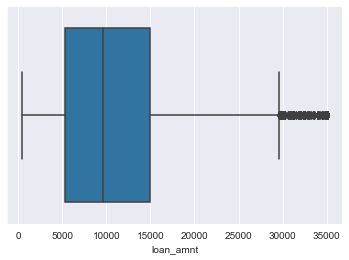

In [86]:
#Assigning uncategorised value in variable
t = ['loan_amnt','funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment','dti','annual_inc','total_pymnt','total_pymnt_inv']
print(sns.boxplot(loan_df[t[0]]))

AxesSubplot(0.125,0.125;0.775x0.755)


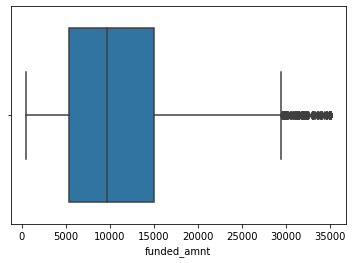

In [32]:
print(sns.boxplot(loan_df[t[1]]))

AxesSubplot(0.125,0.125;0.775x0.755)


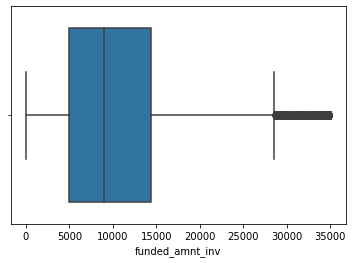

In [33]:
print(sns.boxplot(loan_df[t[2]]))

AxesSubplot(0.125,0.125;0.775x0.755)


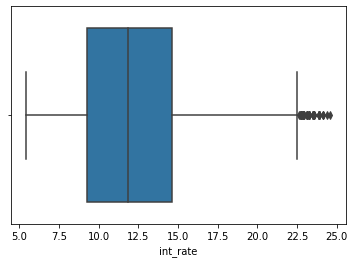

In [34]:
print(sns.boxplot(loan_df[t[3]]))

AxesSubplot(0.125,0.125;0.775x0.755)


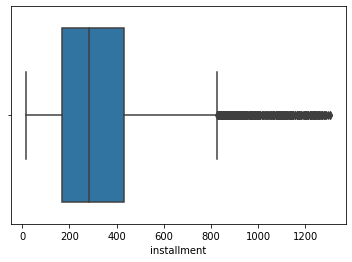

In [35]:
print(sns.boxplot(loan_df[t[4]]))

AxesSubplot(0.125,0.125;0.775x0.755)


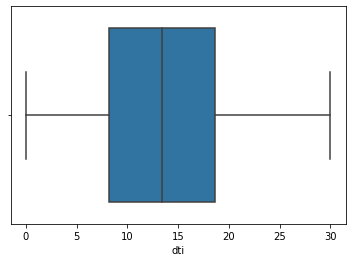

In [36]:
print(sns.boxplot(loan_df[t[5]]))

AxesSubplot(0.125,0.125;0.775x0.755)


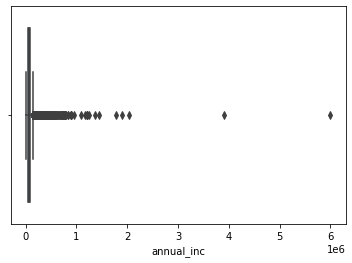

In [37]:
print(sns.boxplot(loan_df[t[6]]))

AxesSubplot(0.125,0.125;0.775x0.755)


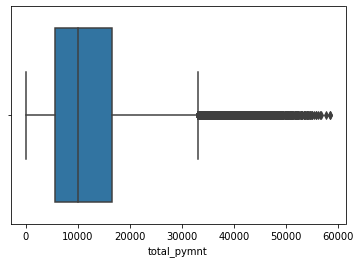

In [38]:
print(sns.boxplot(loan_df[t[7]]))

AxesSubplot(0.125,0.125;0.775x0.755)


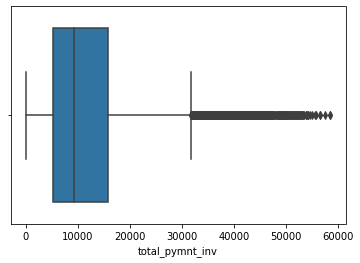

In [39]:
print(sns.boxplot(loan_df[t[8]]))

### Outliers needs to be handled for 'annual_inc'

AxesSubplot(0.125,0.125;0.775x0.755)


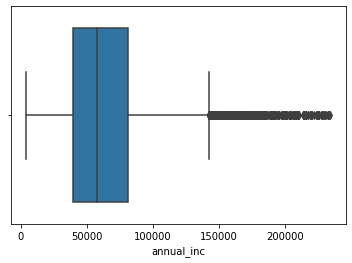

In [40]:
loan_df = loan_df[loan_df.annual_inc <= loan_df['annual_inc'].quantile(0.99)]
print(sns.boxplot(loan_df[t[6]]))

## Data Cleaning 4: Invalid Values
#### Data Cleaning 4.1: Encode unicode properly
#### Data Cleaning 4.2: Convert Incorrect Data Types
#### Data Cleaning 4.3: Convert Values that go Beyong Range
#### Data Cleaning 4.4: Correct Values that not in list
#### Data Cleaning 4.5: Correct Wrong Structure
#### Data Cleaning 4.6: Validate Internal rules

In [41]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec,Fully Paid,credit_card,860,AZ,27.65,0,13648,83.7,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec,Charged Off,car,309,GA,1.00,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,117.08,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec,Fully Paid,small_business,606,IL,8.72,0,2956,98.5,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec,Fully Paid,other,917,CA,20.00,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,0.00,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec,Current,other,972,OR,17.94,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.0


In [42]:
loan_df['grade'].value_counts()

B    11911
A     9996
C     7989
D     5225
E     2772
F     1017
G      304
Name: grade, dtype: int64

In [43]:
loan_df['sub_grade'].value_counts()

B3    2883
A4    2862
A5    2718
B5    2685
B4    2494
C1    2107
B2    2033
C2    1983
B1    1816
A3    1797
C3    1508
A2    1488
D2    1327
C4    1225
C5    1166
D3    1155
A1    1131
D4     967
D1     916
D5     860
E1     751
E2     641
E3     539
E4     447
E5     394
F1     320
F2     245
F3     179
F4     161
F5     112
G1     101
G2      74
G4      53
G3      47
G5      29
Name: sub_grade, dtype: int64

In [44]:
loan_df['emp_length'].value_counts()

10    9803
1     7721
2     4330
3     4051
4     3399
5     3249
6     2204
7     1754
8     1458
9     1245
Name: emp_length, dtype: int64

In [45]:
loan_df['loan_status'].value_counts()

Fully Paid     32526
Charged Off     5562
Current         1126
Name: loan_status, dtype: int64

'Current' loans can be ignored as we are workng to analyse patterens between Fully Paid and Charged Off

In [46]:
loan_df.drop(loan_df[loan_df['loan_status'] == 'Current'].index, inplace = True)

In [47]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan_df['loan_status_boolean'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [48]:
loan_df['verification_status'].value_counts()

Not Verified       16521
Verified           12021
Source Verified     9546
Name: verification_status, dtype: int64

In [49]:
loan_df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

## Data Cleaning 5: Filtering Data
#### Data Cleaning 5.1: Deduplicte Data
#### Data Cleaning 5.2: Filter Rows
#### Data Cleaning 5.3: Filter Columns
#### Data Cleaning 5.4: Aggregate data

In [50]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,pub_rec_bankruptcies,loan_status_boolean
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec,Fully Paid,credit_card,860,AZ,27.65,0,13648,83.7,9,0.0,0.0,5863.16,5833.84,5000.00,863.16,0.00,0.0,0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec,Charged Off,car,309,GA,1.00,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,117.08,0.0,1
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec,Fully Paid,small_business,606,IL,8.72,0,2956,98.5,10,0.0,0.0,3005.67,3005.67,2400.00,605.67,0.00,0.0,0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec,Fully Paid,other,917,CA,20.00,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,0.00,0.0,0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec,Fully Paid,wedding,852,AZ,11.20,0,7963,28.3,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.0,0


In [51]:
loan_df.pub_rec.value_counts()

0    36032
1     2000
2       47
3        7
4        2
Name: pub_rec, dtype: int64

In [88]:
loan_df.drop(['out_prncp','out_prncp_inv',"zip_code",'recoveries','revol_bal','revol_util','sub_grade'],axis = 1, inplace = True)

KeyError: "['out_prncp' 'out_prncp_inv' 'zip_code' 'recoveries' 'revol_bal'\n 'revol_util'] not found in axis"

## Univariate Analysis

### Caterorical Value:
#### Unordered:
['home_ownership', 'verification Status', 'purpose', 'loan_status_boolean','addr_state']
#### Ordered:
['grade', 'emp_length','term','issued_m']
### Quantitative Variable:
['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','total_pymnt','total_pymnt_inv']

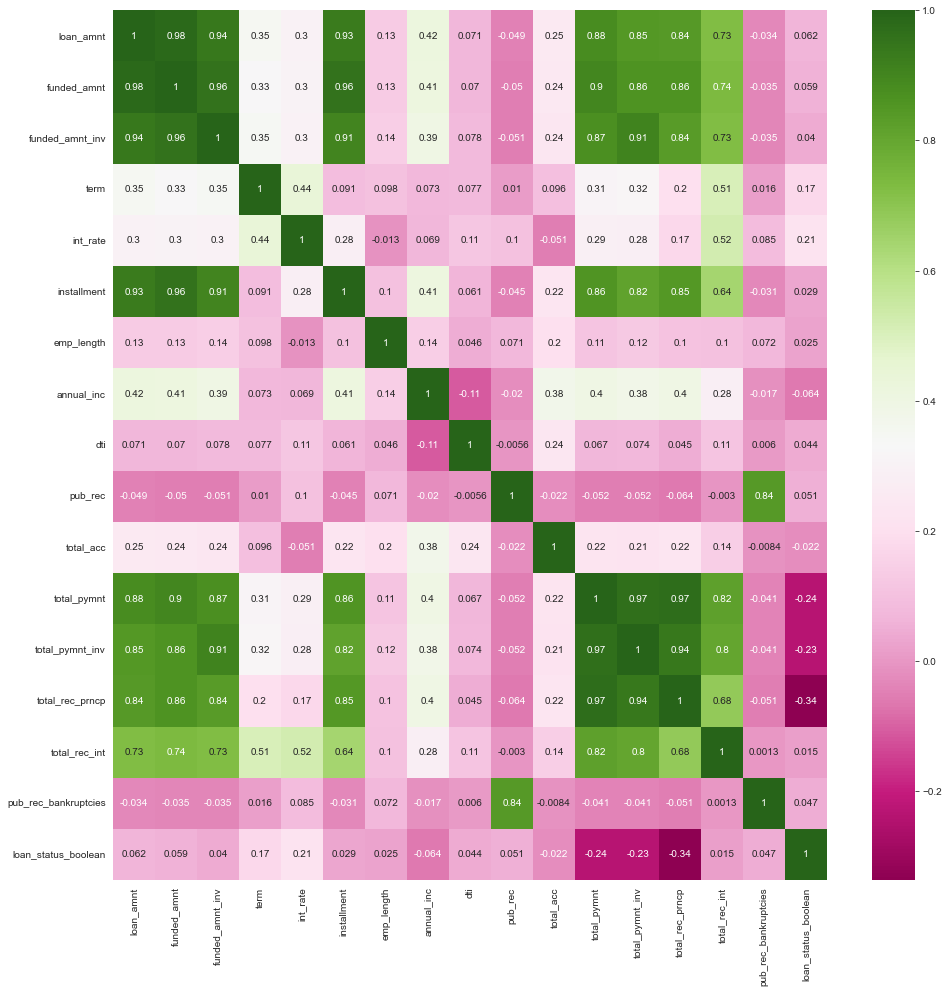

In [87]:
## Cross checking the relation between the variables
plt.figure(figsize=(16, 16))
sns.set_style("whitegrid")
sns.heatmap(loan_df.corr(), cmap="PiYG", annot=True)
plt.show()

In [89]:
# to Display graph for unoredred categorical data
def unordered_categorical(size_x, size_y, column, graphTitle, x_axis, y_axis):
    plt.figure(figsize = (size_x,size_y), facecolor = 'c')
    sns.set_style("darkgrid")
    x = sns.countplot(x = column, data = loan_df, palette = 'mako')
    x.set_title(graphTitle, fontsize = 12, color = 'r')
    x.set_xlabel(x_axis, fontsize = 12, color = 'r')
    x.set_ylabel(y_axis, fontsize = 12, color = 'r')   

    # To show count of values above bars
    totalCounts = loan_df[column].value_counts()
    for i, v in totalCounts.reset_index().iterrows():
        x.text(i, v[column] + 0.1 , v[column], color = 'k')    

# to Display graph for unoredred categorical data on Y axis in case value count is high
def unordered_categorical_y(size_x, size_y, y_column,hue, graphTitle, x_axis, y_axis):
    plt.figure(figsize = (size_x,size_y), facecolor = 'c')
    sns.set_style("darkgrid")
    x = sns.countplot(y = y_column,data = loan_df, hue = hue, palette='GnBu_d')
    x.set_title(graphTitle, fontsize = 14, color = 'r')
    x.set_ylabel(y_axis, fontsize = 14, color = 'r')
    x.set_xlabel(x_axis, fontsize = 14, color = 'r')
    
    df = loan_df.groupby([y_column])['loan_status'].value_counts(normalize=True).rename('Charged off %').reset_index().sort_values(y_column)
    print(df.loc[df['loan_status']=='Charged Off'].sort_values(by = 'Charged off %', ascending=False))
    plt.show()

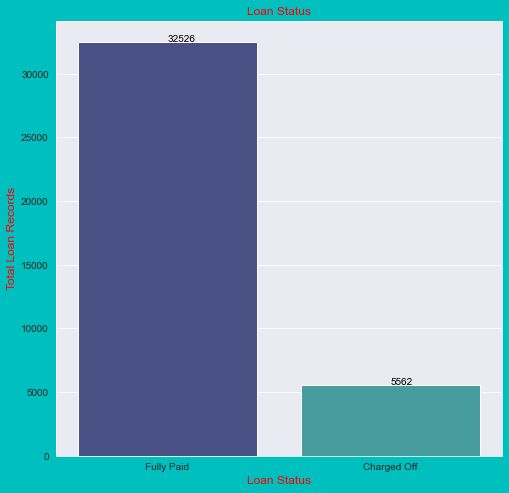

In [55]:
#Unordered Categorical Variables - Loan Status
unordered_categorical(8,8,'loan_status', 'Loan Status', 'Loan Status', 'Total Loan Records')

Above plot shows that close to 15% loans were charged off out of total loan Application

  home_ownership  loan_status  Charged off %
4          OTHER  Charged Off       0.191489
8           RENT  Charged Off       0.153393
6            OWN  Charged Off       0.149183
1       MORTGAGE  Charged Off       0.137147


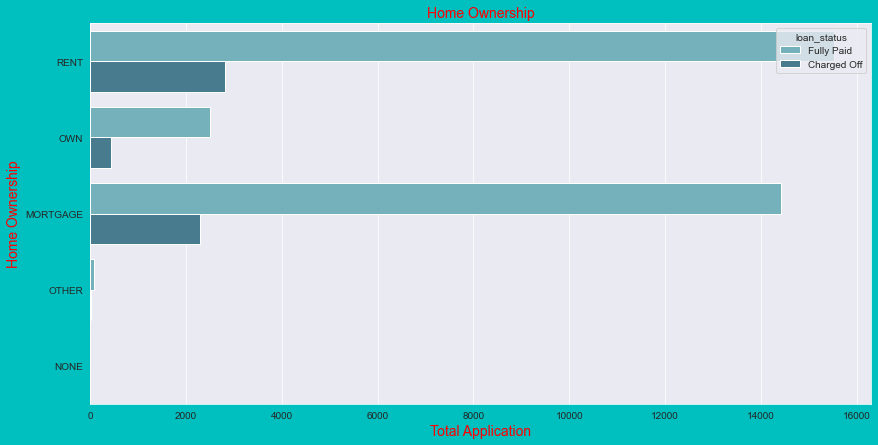

In [91]:
#Unordered Categorical Variables - home ownership
unordered_categorical_y(14,7,'home_ownership','loan_status','Home Ownership','Total Application','Home Ownership')

Above plot shows that most of the loans were Charged Off for Applicants having Home Mortgaged or Rent

               purpose  loan_status  Charged off %
23      small_business  Charged Off       0.274316
21    renewable_energy  Charged Off       0.190000
7          educational  Charged Off       0.173502
19               other  Charged Off       0.163870
11               house  Charged Off       0.162921
17              moving  Charged Off       0.160777
15             medical  Charged Off       0.156250
5   debt_consolidation  Charged Off       0.153476
25            vacation  Charged Off       0.142473
9     home_improvement  Charged Off       0.119655
3          credit_card  Charged Off       0.107603
1                  car  Charged Off       0.106855
13      major_purchase  Charged Off       0.103107
27             wedding  Charged Off       0.101639


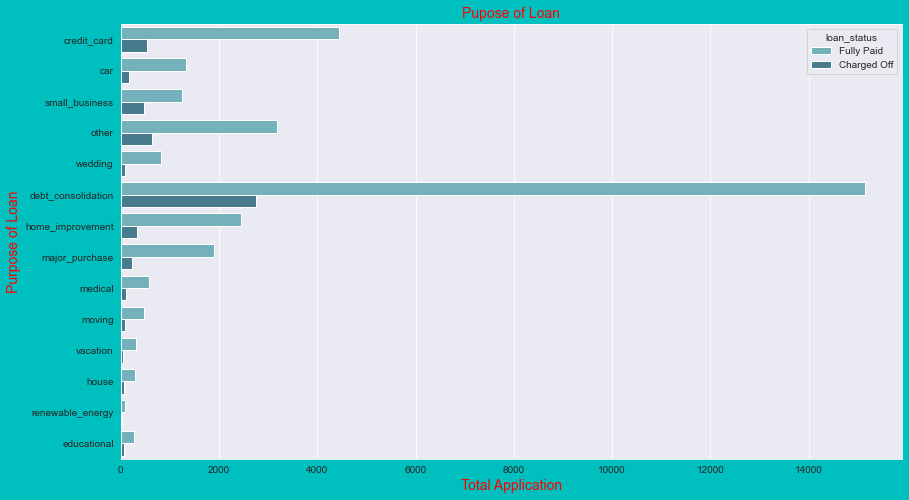

In [57]:
unordered_categorical_y(14,8,'purpose','loan_status','Pupose of Loan','Total Application','Purpose of Loan')

Above plot shows that most of the loans were taken for debt consolidation/paying credit card bill/Small Business/Education

  verification_status  loan_status  Charged off %
5            Verified  Charged Off       0.168538
3     Source Verified  Charged Off       0.148649
1        Not Verified  Charged Off       0.128140


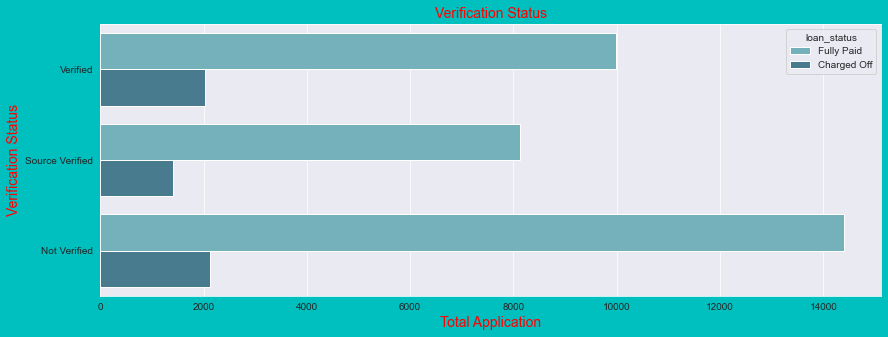

In [58]:
unordered_categorical_y(14,5,'verification_status','loan_status','Verification Status','Total Application','Verification Status')

from above plot, it shows there is no pattern netween Charged Off application and verification Status of applicants

   term  loan_status  Charged off %
3    60  Charged Off       0.254029
1    36  Charged Off       0.110798


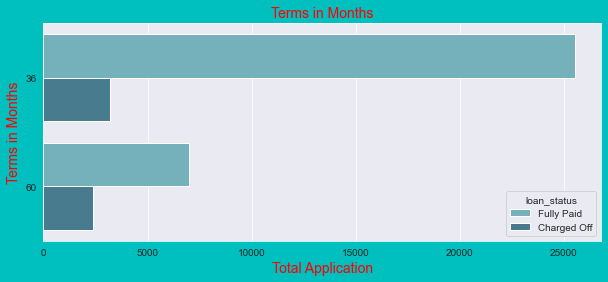

In [59]:
unordered_categorical_y(10,4,'term','loan_status','Terms in Months','Total Application','Terms in Months')

from above plot, appliction who adopts 60 months loan term are more likely to have charged off

   grade  loan_status  Charged off %
13     G  Charged Off       0.337979
11     F  Charged Off       0.325581
9      E  Charged Off       0.269260
7      D  Charged Off       0.221202
5      C  Charged Off       0.172900
3      B  Charged Off       0.122158
1      A  Charged Off       0.060366


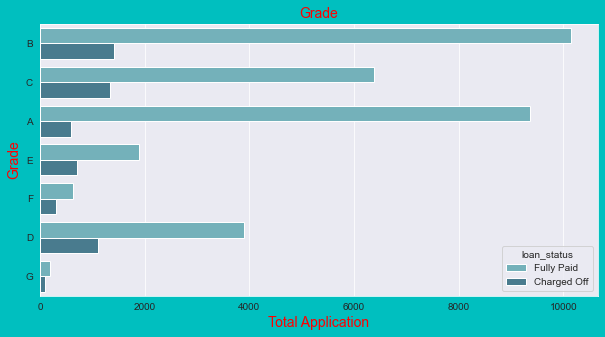

In [60]:
unordered_categorical_y(10,5,'grade','loan_status','Grade','Total Application','Grade')

Above Plot shows, the application having grades B/C/D/G and more likely to have charged off

    emp_length  loan_status  Charged off %
19          10  Charged Off       0.164373
13           7  Charged Off       0.154846
9            5  Charged Off       0.143896
15           8  Charged Off       0.142756
1            1  Charged Off       0.142650
11           6  Charged Off       0.140727
5            3  Charged Off       0.138826
7            4  Charged Off       0.137368
3            2  Charged Off       0.131821
17           9  Charged Off       0.128607


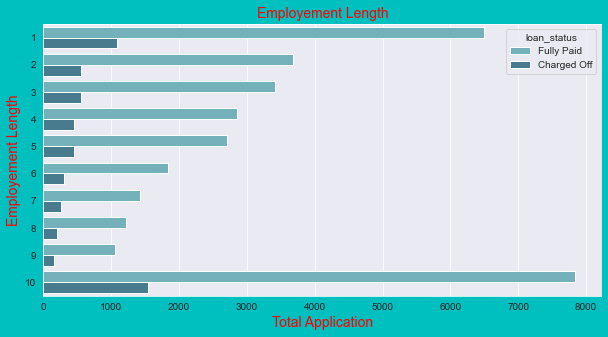

In [92]:
unordered_categorical_y(10,5,'emp_length','loan_status','Employement Length','Total Application','Employement Length')

It is observed that employee having more employee length are moe likely to get Charged Off on lengths

   addr_state  loan_status  Charged off %
54         NE  Charged Off       0.333333
62         NV  Charged Off       0.225738
78         SD  Charged Off       0.196721
1          AK  Charged Off       0.181818
19         FL  Charged Off       0.180459
46         MO  Charged Off       0.170181
23         HI  Charged Off       0.169697
60         NM  Charged Off       0.167598
26         ID  Charged Off       0.166667
9          CA  Charged Off       0.162182
70         OR  Charged Off       0.161290
84         UT  Charged Off       0.159363
21         GA  Charged Off       0.159108
39         MD  Charged Off       0.159046
58         NJ  Charged Off       0.157386
90         WA  Charged Off       0.156790
52         NC  Charged Off       0.153846
56         NH  Charged Off       0.152439
42         MI  Charged Off       0.146132
76         SC  Charged Off       0.145055
33         KY  Charged Off       0.144695
92         WI  Charged Off       0.144186
7          AZ  Charged Off       0

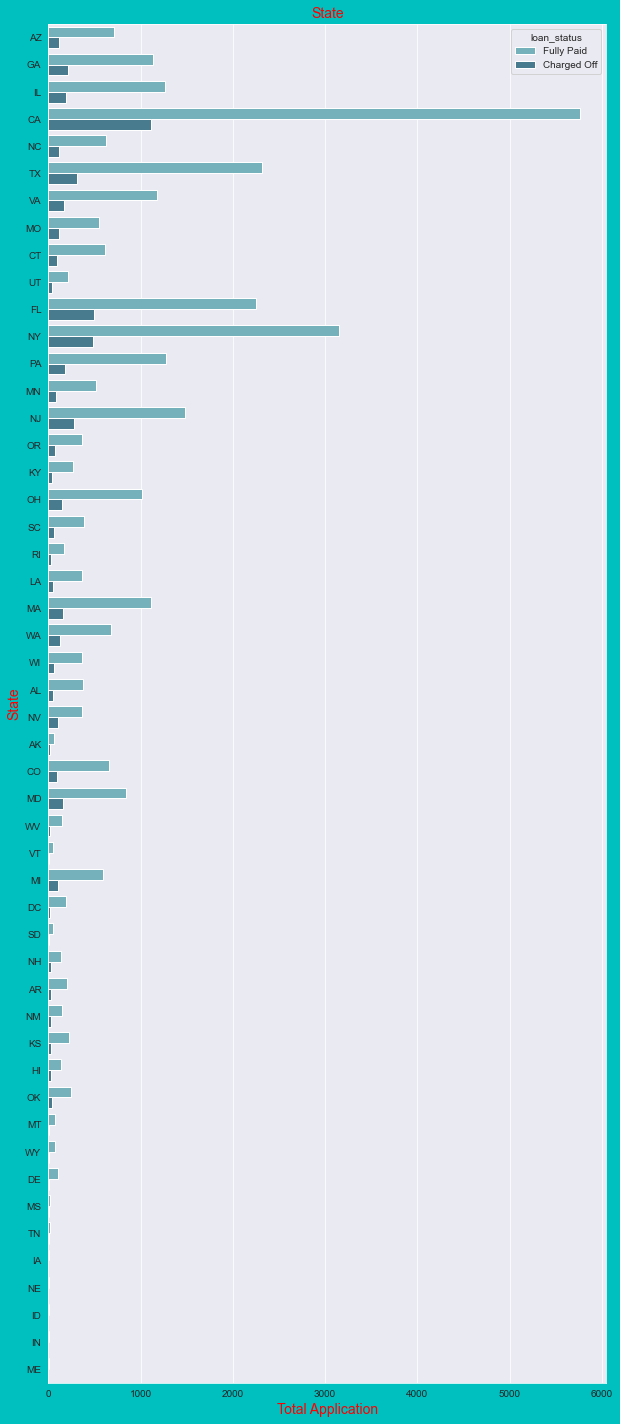

In [94]:
unordered_categorical_y(10,25,'addr_state','loan_status','State','Total Application','State')

The applicants from NE/NV/SD/AK/FL are most likely to get charged Off

   issue_d  loan_status  Charged off %
5      Dec  Charged Off       0.161314
17     May  Charged Off       0.160028
23     Sep  Charged Off       0.157225
21     Oct  Charged Off       0.154241
13     Jun  Charged Off       0.151737
19     Nov  Charged Off       0.149306
11     Jul  Charged Off       0.144248
3      Aug  Charged Off       0.136949
9      Jan  Charged Off       0.134951
1      Apr  Charged Off       0.130745
15     Mar  Charged Off       0.128631
7      Feb  Charged Off       0.123340


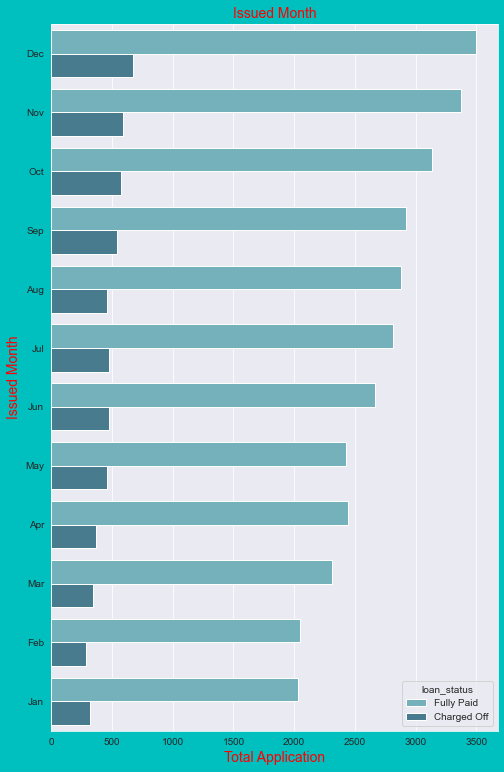

In [63]:
unordered_categorical_y(8,13,'issue_d','loan_status','Issued Month','Total Application','Issued Month')

The applicants who to whome loan was issued in December are more likely to be defaulters

   pub_rec_bankruptcies  loan_status  Charged off %
5                   2.0  Charged Off       0.400000
3                   1.0  Charged Off       0.223313
1                   0.0  Charged Off       0.142540


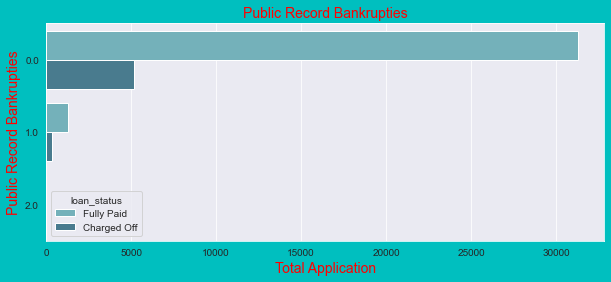

In [64]:
unordered_categorical_y(10,4,'pub_rec_bankruptcies','loan_status','Public Record Bankrupties','Total Application','Public Record Bankrupties')

The applicant whose public Record bankrupties are reported more than 1 times are the one who will be defaulters

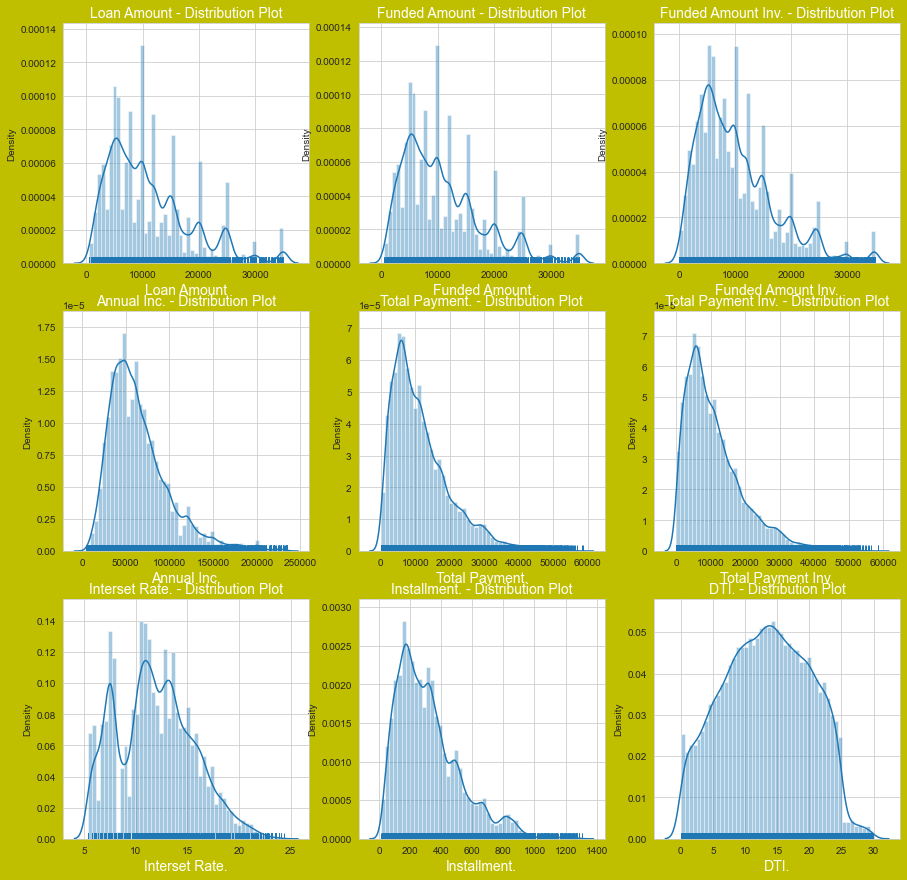

In [95]:
# Lets see distribution of Quantitative features using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,15),facecolor='y')
sns.set_style("whitegrid")
# subplot 1
plt.subplot(3, 3, 1)
x = sns.distplot(loan_df['loan_amnt'],rug = True)
x.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
x.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(3, 3, 2)
x = sns.distplot(loan_df['funded_amnt'],rug = True)
x.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
x.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(3, 3, 3)
x = sns.distplot(loan_df['funded_amnt_inv'],rug = True)
x.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
x.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')

plt.subplot(3, 3, 4)
x = sns.distplot(loan_df['annual_inc'],rug = True)
x.set_title('Annual Inc. - Distribution Plot',fontsize=14,color='w')
x.set_xlabel('Annual Inc.',fontsize=14,color='w')


plt.subplot(3, 3, 5)
x = sns.distplot(loan_df['total_pymnt'],rug = True)
x.set_title('Total Payment. - Distribution Plot',fontsize=14,color='w')
x.set_xlabel('Total Payment.',fontsize=14,color='w')

plt.subplot(3, 3, 6)
x = sns.distplot(loan_df['total_pymnt_inv'],rug = True)
x.set_title('Total Payment Inv. - Distribution Plot',fontsize=14,color='w')
x.set_xlabel('Total Payment Inv.',fontsize=14,color='w')

plt.subplot(3, 3, 7)
x = sns.distplot(loan_df['int_rate'],rug = True)
x.set_title('Interset Rate. - Distribution Plot',fontsize=14,color='w')
x.set_xlabel('Interset Rate.',fontsize=14,color='w')

plt.subplot(3, 3, 8)
x = sns.distplot(loan_df['installment'],rug = True)
x.set_title('Installment. - Distribution Plot',fontsize=14,color='w')
x.set_xlabel('Installment.',fontsize=14,color='w')

plt.subplot(3, 3, 9)
x = sns.distplot(loan_df['dti'],rug = True)
x.set_title('DTI. - Distribution Plot',fontsize=14,color='w')
x.set_xlabel('DTI.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.
# We will work with only loan amount column for rest of our analysis.

### Observation:
- Loan Amount, Funded amount and Funded Amount Inv are similar so Loan Amount can be look in to in more detail
- Annual Inc, Total Payment and Total Payment Inv are similar so Annual Inc can be look in to in more detail
- Interset Rate
- Installment
- DTI

## Segmented Univariate Analysis

In [97]:
# Creating bins of Following features to analyse frequencies and comparing the same with each other

loan_df['loan_amnt_bin'] = pd.qcut(loan_df['loan_amnt'], q=5, precision=0)
loan_df['annual_inc_bin'] = pd.qcut(loan_df['annual_inc'], q=5, precision=0)
loan_df['installment_bin'] = pd.qcut(loan_df['installment'], q=5, precision=0)
loan_df['int_rate_bin'] = pd.qcut(loan_df['int_rate'], q=5, precision=0)
loan_df['dti_bin'] = pd.qcut(loan_df['dti'], q=5, precision=0)

        dti_bin  loan_status  Charged off %
9  (20.0, 30.0]  Charged Off       0.168794
7  (15.0, 20.0]  Charged Off       0.157812
5  (11.0, 15.0]  Charged Off       0.148721
3   (7.0, 11.0]  Charged Off       0.131441
1   (-1.0, 7.0]  Charged Off       0.123444


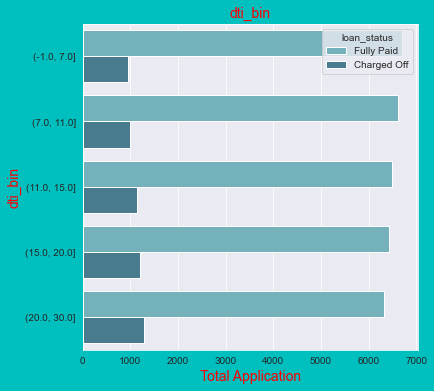

In [101]:
# Analysis based on DTI_BIN
unordered_categorical_y(6,6,'dti_bin','loan_status','dti_bin','Total Application','dti_bin')

The Applicant whose DTI value is more, are the ones who are most likely to get charged off

   int_rate_bin  loan_status  Charged off %
9  (15.0, 24.0]  Charged Off       0.262829
7  (13.0, 15.0]  Charged Off       0.172248
5  (11.0, 13.0]  Charged Off       0.141699
3   (8.0, 11.0]  Charged Off       0.102919
1    (4.0, 8.0]  Charged Off       0.053877


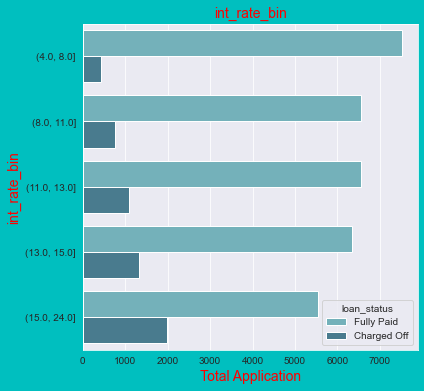

In [102]:
# Analysis based on INT_RATE_BIN
unordered_categorical_y(6,6,'int_rate_bin','loan_status','int_rate_bin','Total Application','int_rate_bin')

The Applicant whose Interest Rate value is more, are the ones who are most likely to get charged off

   installment_bin  loan_status  Charged off %
9  (476.0, 1305.0]  Charged Off       0.167214
7   (327.0, 476.0]  Charged Off       0.152727
1    (15.0, 149.0]  Charged Off       0.144469
5   (228.0, 327.0]  Charged Off       0.133570
3   (149.0, 228.0]  Charged Off       0.132187


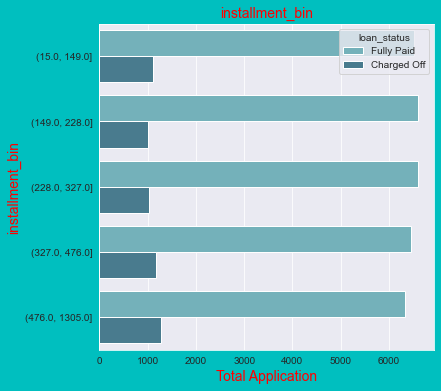

In [99]:
# Analysis based on installment_bin
unordered_categorical_y(6,6,'installment_bin','loan_status','installment_bin','Total Application','installment_bin')

the applicant who pays more installments are the one who are defaulters

        annual_inc_bin  loan_status  Charged off %
1    (3999.0, 37000.0]  Charged Off       0.183172
3   (37000.0, 50000.0]  Charged Off       0.155501
5   (50000.0, 65000.0]  Charged Off       0.150266
7   (65000.0, 90000.0]  Charged Off       0.129896
9  (90000.0, 234600.0]  Charged Off       0.109212


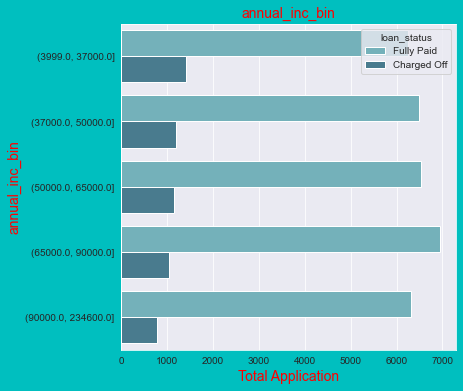

In [103]:
# Analysis based on ANNUAL_INC_BIN
unordered_categorical_y(6,6,'annual_inc_bin','loan_status','annual_inc_bin','Total Application','annual_inc_bin')

Issuing Loan to the applicant having less Annual Income i.e. less than 40K are more likely to be defaulters

        loan_amnt_bin  loan_status  Charged off %
9  (16000.0, 35000.0]  Charged Off       0.189259
7  (11000.0, 16000.0]  Charged Off       0.145807
1     (499.0, 5000.0]  Charged Off       0.138572
5   (7600.0, 11000.0]  Charged Off       0.134135
3    (5000.0, 7600.0]  Charged Off       0.119571


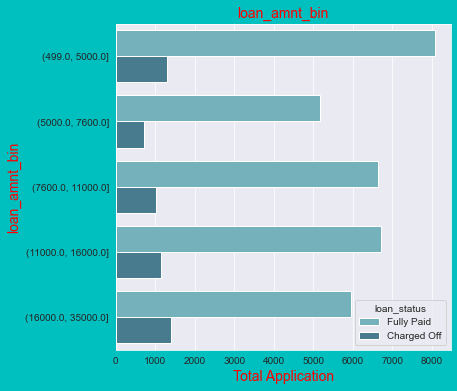

In [104]:
# Analysis based on LOAN_Amount_bin
unordered_categorical_y(6,6,'loan_amnt_bin','loan_status','loan_amnt_bin','Total Application','loan_amnt_bin')

In [72]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,pub_rec_bankruptcies,loan_status_boolean,loan_amnt_bin,annual_inc_bin,installment_bin,int_rate_bin,dti_bin
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec,Fully Paid,credit_card,AZ,27.65,0,9,5863.16,5833.84,5000.00,863.16,0.0,0,"(499.0, 5000.0]","(3999.0, 37000.0]","(149.0, 228.0]","(8.0, 11.0]","(20.0, 30.0]"
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec,Charged Off,car,GA,1.00,0,4,1008.71,1008.71,456.46,435.17,0.0,1,"(499.0, 5000.0]","(3999.0, 37000.0]","(15.0, 149.0]","(15.0, 24.0]","(-1.0, 7.0]"
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec,Fully Paid,small_business,IL,8.72,0,10,3005.67,3005.67,2400.00,605.67,0.0,0,"(499.0, 5000.0]","(3999.0, 37000.0]","(15.0, 149.0]","(15.0, 24.0]","(7.0, 11.0]"
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec,Fully Paid,other,CA,20.00,0,37,12231.89,12231.89,10000.00,2214.92,0.0,0,"(7600.0, 11000.0]","(37000.0, 50000.0]","(327.0, 476.0]","(13.0, 15.0]","(20.0, 30.0]"
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec,Fully Paid,wedding,AZ,11.20,0,12,5632.21,5632.21,5000.00,632.21,0.0,0,"(499.0, 5000.0]","(3999.0, 37000.0]","(149.0, 228.0]","(4.0, 8.0]","(7.0, 11.0]"


## Bivariate Analysis
### Continuous Variables to analyse defaulters
- loan_amnt
- int_rate
- installment
- annual_inc
- dti
- total_acc


### Categorical Variables to analyse defaulters
- term
- int_rate_bin
- installment_bin
- grade
- emp_length
- home_ownership
- annual_inc_bin
- verification_status
- issue_d
- loan_status
- purpose
- addr_state
- pub_rec_bankruptcies
- dti_bin
- loan_amnt_bin


### Relationship to Analyse 
- loan_amnt vs int_rate
- loan_amnt vs annual_inc_bin
- int_rate_bin vs dti
- installment vs annual_inc_bin vs loan_status
- annual_inc vs total_acc vs loan_status
- dti vs annual_inc_bin
- grade vs int_rate_bin
- emp_length vs pub_rec_bankrupties vs loan_status
- home_ownership vs purpose vs loan_status
- verfication_status vs pub_rec_bankrupties
- addr_state vs purpose vs loan_status


In [105]:
# to plot boxplot for continuous features
def bivariate_continuous(y_axis, x_axis, title, y_label, x_label, figsize= (8,8)):
    plt.figure(figsize = figsize, facecolor = 'y')
    a = sns.boxplot(y = y_axis, x = x_axis, data =loan_df,palette='rainbow')
    a.set_title(title, fontsize = 15, color = 'w')
    a.set_ylabel(y_label, fontsize = 14, color = 'w')
    a.set_xlabel(x_label, fontsize = 14, color = 'w')
    plt.show()

# to plot violinplot for continuous features based on loan Status Feature
def bivariate_continuous_filter(y_axis, x_axis, title, y_label, x_label, figsize=(8,8)):
    fig, x = plt.subplots(figsize = figsize) 
    sns.violinplot(data = loan_df, x = x_axis, y = y_axis, hue = 'loan_status', split = True, ax = x,  hue_order = ['Fully Paid','Charged Off'])
    plt.show()

# to plot for categorical features    
def bivariate_categorical(x_axis, y_axis, title, figsize=(8,6)):
    fig, x = plt.subplots(figsize = figsize)
    pt = pd.pivot_table(data = loan_df, values = 'loan_status_boolean', index = y_axis, columns = x_axis)
    sns.heatmap(pt, ax = x, cmap='PiYG', annot = True)
    plt.show()

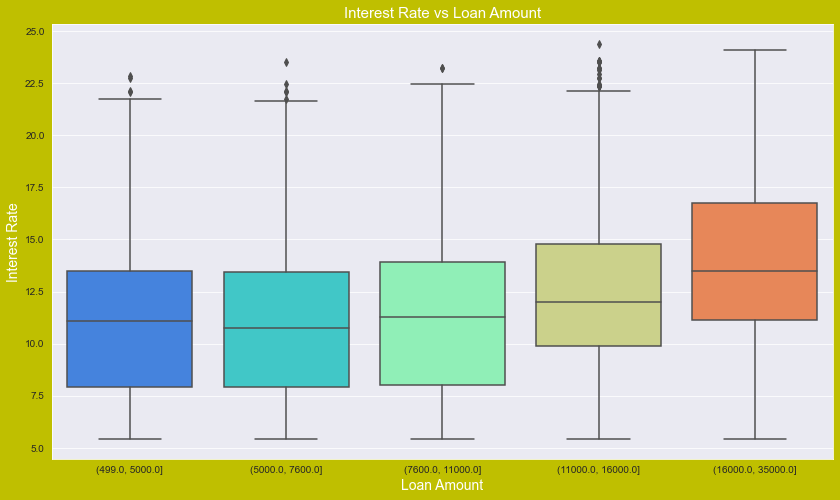

In [74]:
# To Analyse Int_rate vs Loan_amount_bin
bivariate_continuous('int_rate', 'loan_amnt_bin', 'Interest Rate vs Loan Amount', 'Interest Rate', 'Loan Amount', (14,8))

Interest Rate increases based on Loan Amount Value

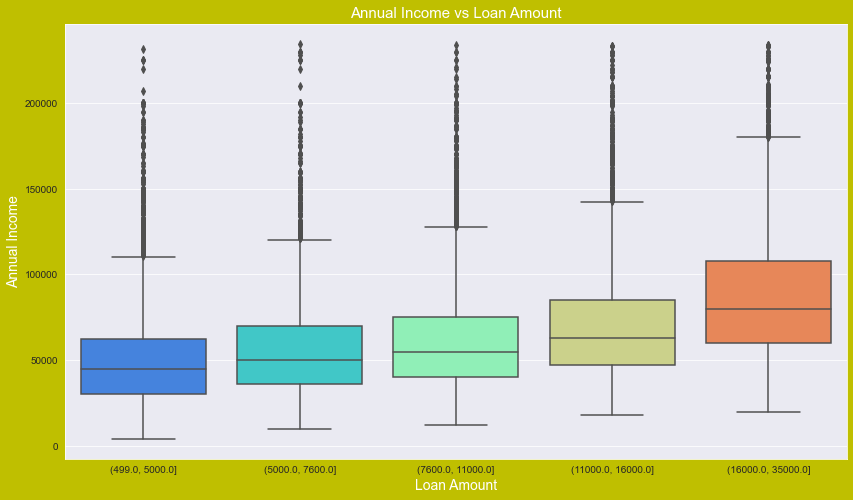

In [75]:
bivariate_continuous('annual_inc', 'loan_amnt_bin', 'Annual Income vs Loan Amount', 'Annual Income', 'Loan Amount', (14,8))

Applicants having more Annual Income ask for more Loan

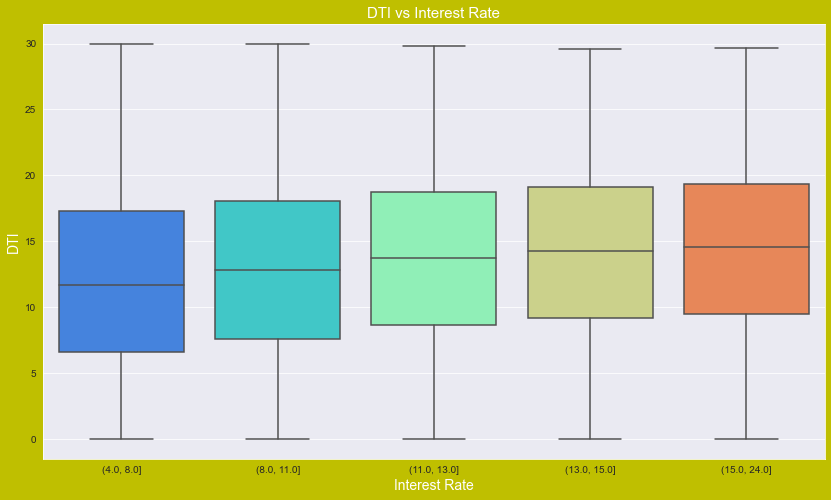

In [76]:
bivariate_continuous('dti', 'int_rate_bin', 'DTI vs Interest Rate', 'DTI', 'Interest Rate', (14,8))

Intersest Rate differs irrespective of DTI value

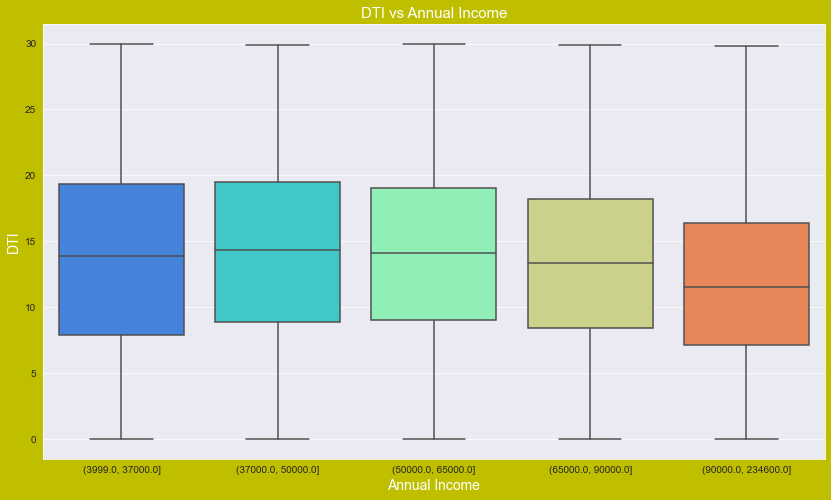

In [77]:
bivariate_continuous('dti', 'annual_inc_bin', 'DTI vs Annual Income', 'DTI', 'Annual Income', (14,8))

The applicants having more income has DTI value less

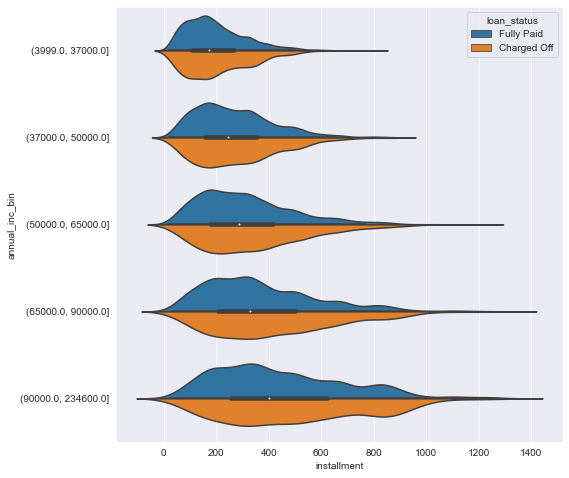

In [78]:
bivariate_continuous_filter('annual_inc_bin', 'installment', 'test', 'Annual Income', 'Installment' )

As the installment Amount increase with Annual Income of applicant, number of charged Off is also increases

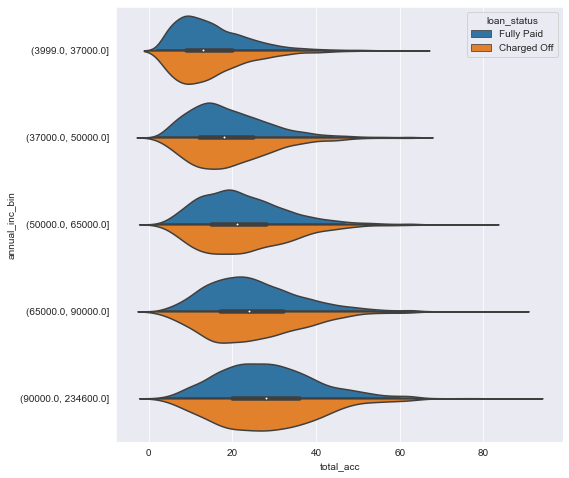

In [79]:
bivariate_continuous_filter('annual_inc_bin', 'total_acc', 'test', 'Annual Income', 'Installment' )

As the Number of Account increases with Annual Income of applicant, number of charged Off is also increases

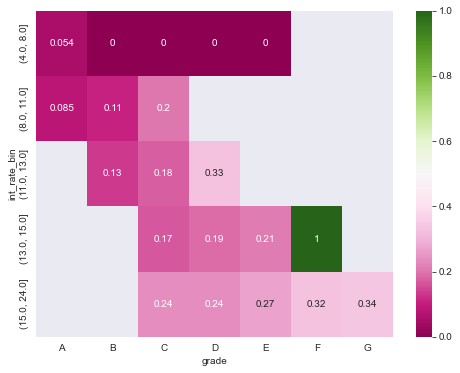

In [80]:
bivariate_categorical('grade', 'int_rate_bin', 'Grade vs Interest Rate')

The applicants with Grade F havin intrest rate between 13-15 and Grade A having lowere interest Rate are the one who are more riskier to LC

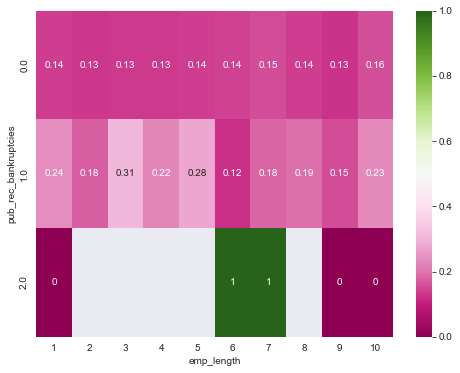

In [81]:
bivariate_categorical('emp_length', 'pub_rec_bankruptcies', 'Employee Length vs Banruptcies')

The applicants who are having experience 5-7 and have bankrupticies record more that 1 are nore riskier

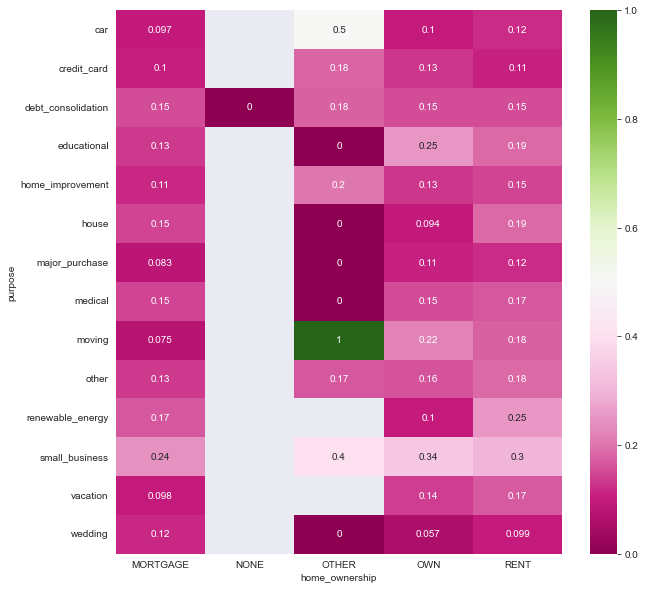

In [82]:
bivariate_categorical('home_ownership', 'purpose', 'Employee Length vs Home Ownership', (10,10) )

The applicants wwhose purpose of loan is for moving and there is no specefic record related to Home Ownership are more likely riskier one.

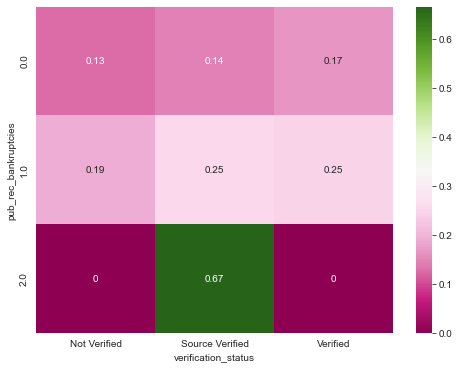

In [83]:
bivariate_categorical('verification_status', 'pub_rec_bankruptcies', 'Verification Status vs Bankruptcies')

The Accounts which are verified with 2 bankruptcies account are the riskier one

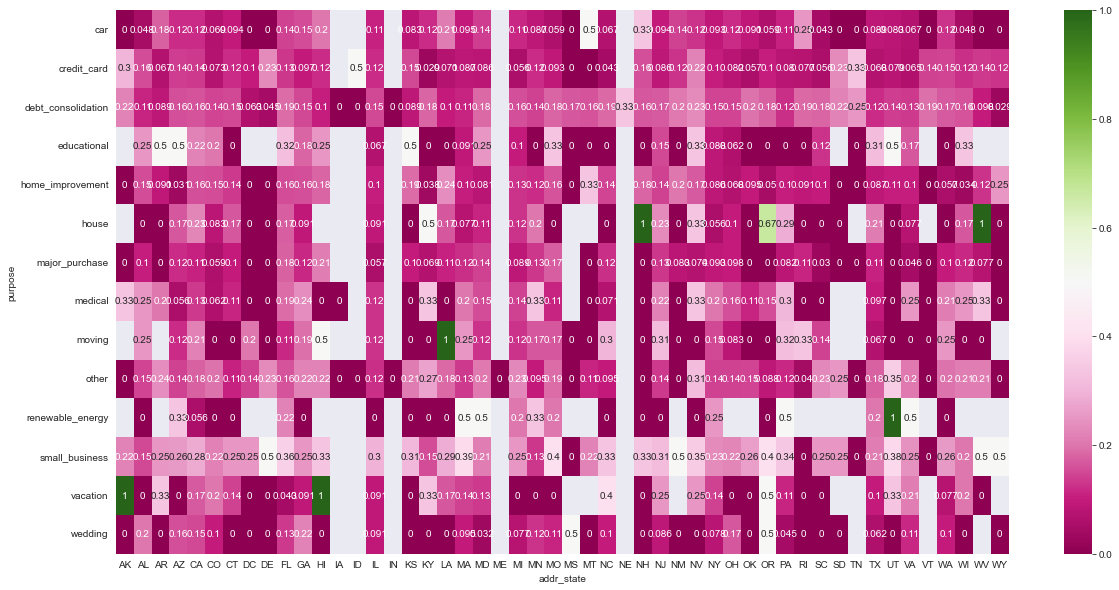

In [84]:
bivariate_categorical('addr_state', 'purpose', 'Employee Length vs Banruptcies', (20,10))

The applicants from AK/HI/LA/NH/UT/WV who have taken loan for Vacation/Moving/House/Renewabl